In [17]:
import sqlite3
import pandas as pd

# Path to your SQLite database
db_path = "../data/data.db"

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)


taxi_data = pd.read_sql_query("SELECT * FROM taxi_data;", conn)

weather_data = pd.read_sql_query("SELECT * FROM weather_data;", conn)


# Close the connection
conn.close()


Tables in the database:
                name
0  taxi_data_grouped
1          taxi_data
2       weather_data


In [18]:
print(taxi_data)

           date  total_passenger_count  total_trip  average_trip_time
0    2001-01-01                    2.0           2         224.075000
1    2001-02-02                    1.0           1          12.333333
2    2002-02-02                   14.0          11         371.081481
3    2002-12-31                    2.0           2         791.441667
4    2003-01-01                   11.0           6         283.550000
5    2008-08-08                   11.0           3         337.116667
6    2008-12-31                  411.0         199         289.762327
7    2009-01-01                  650.0         400         253.737196
8    2009-01-02                    2.0           2           7.025000
9    2010-08-08                    2.0           1        1188.616667
10   2015-11-09                    1.0           1           0.733333
11   2018-11-28                   42.0          10         103.870000
12   2018-11-29                    5.0           1          17.350000
13   2018-12-21     

In [ ]:
# Filter data for 2019 only
taxi_data['date'] = pd.to_datetime(taxi_data['date'])  # Ensure 'date' column is a datetime object
taxi_data_2019 = taxi_data[(taxi_data['date'] >= '2019-01-01') & (taxi_data['date'] <= '2019-12-31')]

# Print the filtered data
print(taxi_data_2019)


          date  total_passenger_count  total_trip  average_trip_time
16  2019-01-01               319678.0      189035          17.744783
17  2019-01-02               317395.0      197852          16.464732
18  2019-01-03               350961.0      222879          16.994892
19  2019-01-04               373023.0      235053          16.327286
20  2019-01-05               390129.0      236041          15.886989
21  2019-01-06               339398.0      208194          15.227768
22  2019-01-07               350154.0      227762          15.403937
23  2019-01-08               362405.0      236155          16.188662
24  2019-01-09               389522.0      254671          16.383123
25  2019-01-10               431261.0      280648          16.869345
26  2019-01-11               452201.0      290607          17.406740
27  2019-01-12               430457.0      264567          16.287524
28  2019-01-13               365625.0      226924          15.143823
29  2019-01-14               37526

In [39]:
print(weather_data.head)

<bound method NDFrame.head of          name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0    New York  2019-01-01     14.6      5.2  10.2          14.6           1.2   
1    New York  2019-01-02      4.5      1.7   3.0           3.8          -2.3   
2    New York  2019-01-03      6.7      3.3   5.1           6.4          -0.9   
3    New York  2019-01-04      8.0      1.8   4.9           7.7          -2.1   
4    New York  2019-01-05      8.1      6.0   6.7           8.1           2.1   
5    New York  2019-01-06      9.1      0.4   5.7           5.6          -6.6   
6    New York  2019-01-07      0.8     -3.7  -1.4          -0.5          -9.7   
7    New York  2019-01-08      6.7      1.3   4.9           6.0          -2.7   
8    New York  2019-01-09      7.0      1.5   5.4           4.0          -5.0   
9    New York  2019-01-10      1.3     -1.5   0.2          -4.5          -8.5   
10   New York  2019-01-11     -0.9     -6.0  -3.3          -7.9         -13.8  

In [43]:
print(weather_data.shape)

(365, 33)


In [23]:
# Select only the required columns from the weather data
final_weather_data = weather_data[['datetime', 'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'visibility']]

# Preview the filtered data
print(final_weather_data.head())


     datetime  tempmax  tempmin  temp  humidity  windspeed  visibility
0  2019-01-01     14.6      5.2  10.2      70.2       39.9        13.6
1  2019-01-02      4.5      1.7   3.0      55.4       21.6        16.0
2  2019-01-03      6.7      3.3   5.1      63.8       33.2        15.9
3  2019-01-04      8.0      1.8   4.9      62.3       26.2        15.9
4  2019-01-05      8.1      6.0   6.7      89.2       28.8         8.9


In [44]:

print(taxi_data_2019.head())

          date  total_passenger_count  total_trip  average_trip_time
16  2019-01-01               319678.0      189035          17.744783
17  2019-01-02               317395.0      197852          16.464732
18  2019-01-03               350961.0      222879          16.994892
19  2019-01-04               373023.0      235053          16.327286
20  2019-01-05               390129.0      236041          15.886989


In [50]:
# Rename 'datetime' column to 'date' in final_weather_data
final_weather_data.rename(columns={'datetime': 'date'}, inplace=True)

# Ensure both DataFrames have the same type for the 'date' column
final_weather_data['date'] = pd.to_datetime(final_weather_data['date']).dt.date  # Convert 'date' to datetime.date format
taxi_data_2019['date'] = pd.to_datetime(taxi_data_2019['date']).dt.date  # Convert 'date' to datetime.date format

# Select only the required columns from taxi_data_2019
taxi_columns = ['date', 'total_passenger_count', 'total_trip', 'average_trip_time']
taxi_data_2019 = taxi_data_2019[taxi_columns]

# Select only the required columns from final_weather_data
weather_columns = ['date', 'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'visibility']
final_weather_data = final_weather_data[weather_columns]

# Merge the DataFrames on the 'date' column
df = pd.merge(taxi_data_2019, final_weather_data, on='date', how='inner')

# Print the final merged DataFrame
print(df.head())

         date  total_passenger_count  total_trip  average_trip_time  tempmax  \
0  2019-01-01               319678.0      189035          17.744783     14.6   
1  2019-01-02               317395.0      197852          16.464732      4.5   
2  2019-01-03               350961.0      222879          16.994892      6.7   
3  2019-01-04               373023.0      235053          16.327286      8.0   
4  2019-01-05               390129.0      236041          15.886989      8.1   

   tempmin  temp  humidity  windspeed  visibility  
0      5.2  10.2      70.2       39.9        13.6  
1      1.7   3.0      55.4       21.6        16.0  
2      3.3   5.1      63.8       33.2        15.9  
3      1.8   4.9      62.3       26.2        15.9  
4      6.0   6.7      89.2       28.8         8.9  


In [51]:
print(df.shape)


(365, 10)


           date  total_passenger_count  total_trip  average_trip_time  \
0    2019-01-01               319678.0      189035          17.744783   
1    2019-01-02               317395.0      197852          16.464732   
2    2019-01-03               350961.0      222879          16.994892   
3    2019-01-04               373023.0      235053          16.327286   
4    2019-01-05               390129.0      236041          15.886989   
5    2019-01-06               339398.0      208194          15.227768   
6    2019-01-07               350154.0      227762          15.403937   
7    2019-01-08               362405.0      236155          16.188662   
8    2019-01-09               389522.0      254671          16.383123   
9    2019-01-10               431261.0      280648          16.869345   
10   2019-01-11               452201.0      290607          17.406740   
11   2019-01-12               430457.0      264567          16.287524   
12   2019-01-13               365625.0      226924 

C:\Users\mulan\AppData\Local\Temp\ipykernel_9696\3864676852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data_2019['date'] = pd.to_datetime(taxi_data_2019['date']).dt.date


In [15]:
taxi_data_2019.describe()

,date,total_passenger_count,total_trip,average_trip_time
count,365,365.000000,365.000000,365.000000
mean,2019-07-02 00:00:00,360279.517808,231226.238356,54.432885
min,2019-01-01 00:00:00,167781.000000,101917.000000,7.679438
25%,2019-04-02 00:00:00,328240.000000,211219.000000,16.917281
50%,2019-07-02 00:00:00,363733.000000,236041.000000,19.301854
75%,2019-10-01 00:00:00,395548.000000,256629.000000,71.824442
max,2019-12-31 00:00:00,461982.000000,298099.000000,500.131529
std,NaN,50254.211841,33968.590548,64.923725


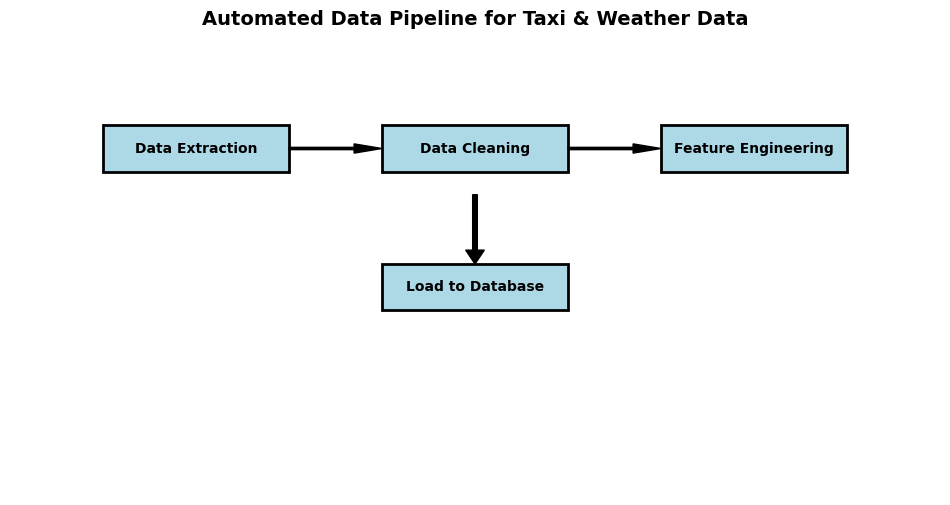

In [38]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow, Rectangle

# Initialize the figure
plt.figure(figsize=(12, 6))

# Define positions and sizes for rectangles and arrows
positions = {
    "Data Extraction": (0.1, 0.7),
    "Data Cleaning": (0.4, 0.7),
    "Feature Engineering": (0.7, 0.7),
    "Load to Database": (0.4, 0.4),
}
sizes = (0.2, 0.1)  # Width, Height of each box

# Draw rectangles (pipeline steps)
for step, (x, y) in positions.items():
    plt.gca().add_patch(Rectangle((x, y), *sizes, edgecolor="black", facecolor="lightblue", lw=2))
    plt.text(x + 0.1, y + 0.05, step, ha="center", va="center", fontsize=10, fontweight="bold")

# Draw arrows connecting the steps
arrow_params = {"width": 0.005, "length_includes_head": True, "head_width": 0.02, "head_length": 0.03, "color": "black"}
plt.arrow(0.3, 0.75, 0.1, 0, **arrow_params)  # Between Data Extraction and Cleaning
plt.arrow(0.6, 0.75, 0.1, 0, **arrow_params)  # Between Cleaning and Feature Engineering
plt.arrow(0.5, 0.65, 0, -0.15, **arrow_params)  # From Cleaning to Load to Database

# Add diagram title
plt.title("Automated Data Pipeline for Taxi & Weather Data", fontsize=14, fontweight="bold")

# Set limits and hide axes
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis("off")

# Display the diagram
plt.show()


In [16]:
# Check for missing values in each column
missing_values = taxi_data_2019.isnull().sum()

# Display columns with missing values
print("Missing values per column:")
print(missing_values)


Missing values per column:
date                     0
total_passenger_count    0
total_trip               0
average_trip_time        0
dtype: int64


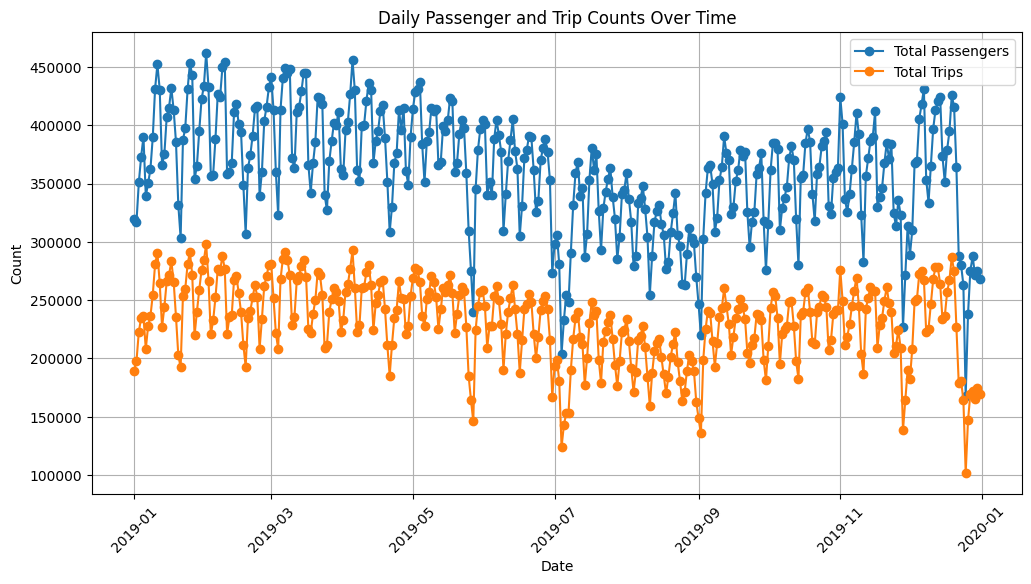

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(taxi_data_2019['date'], taxi_data_2019['total_passenger_count'], label="Total Passengers", marker='o')
plt.plot(taxi_data_2019['date'], taxi_data_2019['total_trip'], label="Total Trips", marker='o')
plt.title("Daily Passenger and Trip Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


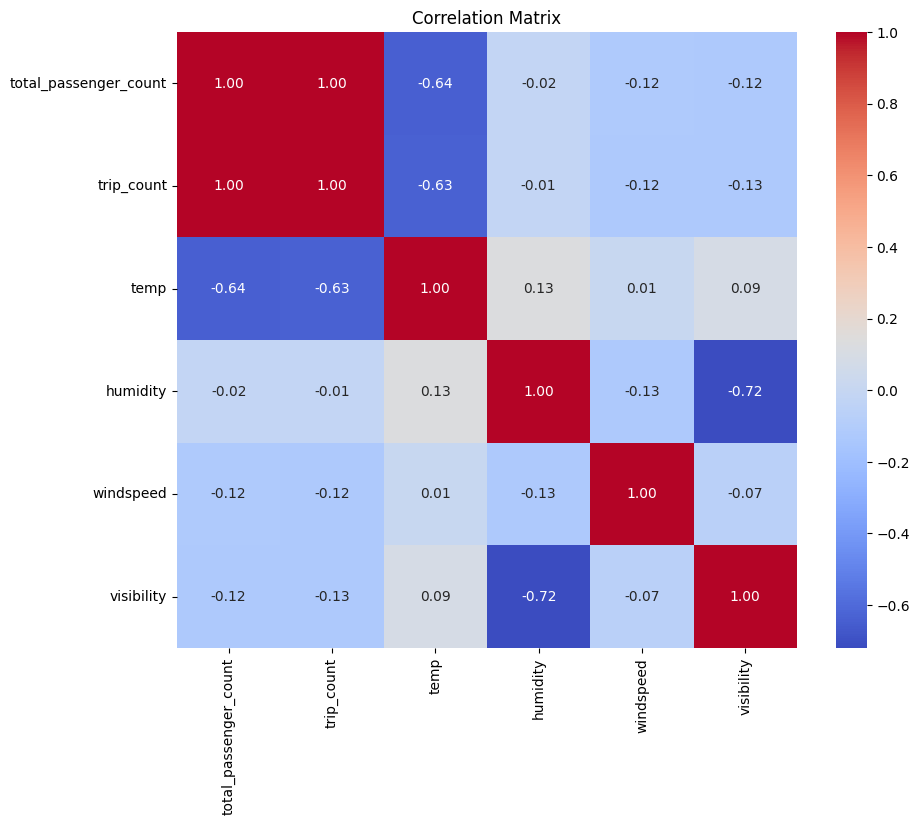

In [ ]:
correlation_matrix = [['total_passenger_count', 'total_trip','average_trip_time' 'temp', 'humidity', 'windspeed', 'visibility']].corr()

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


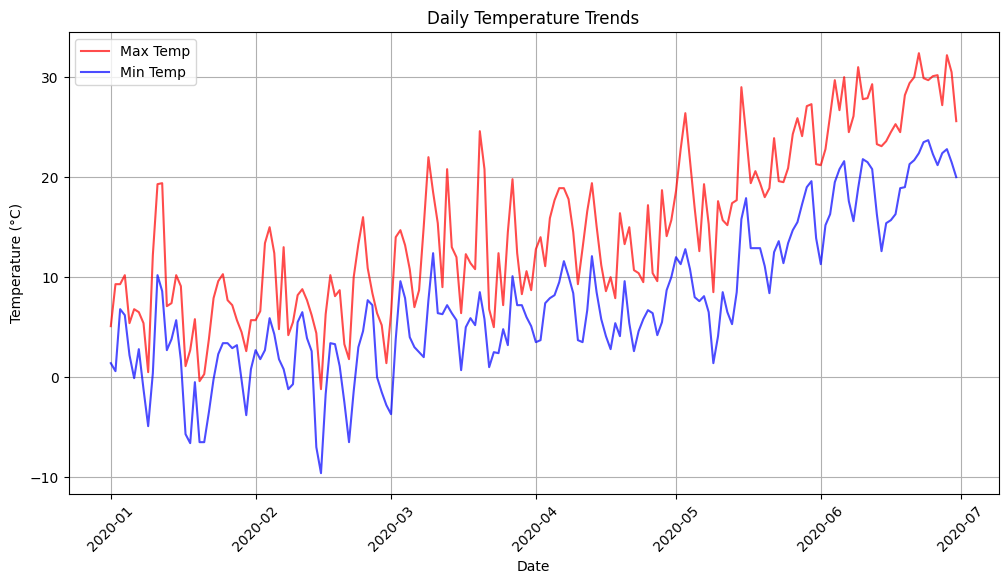

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['tempmax'], label="Max Temp", color='red', alpha=0.7)
plt.plot(df['date'], df['tempmin'], label="Min Temp", color='blue', alpha=0.7)
plt.title("Daily Temperature Trends")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


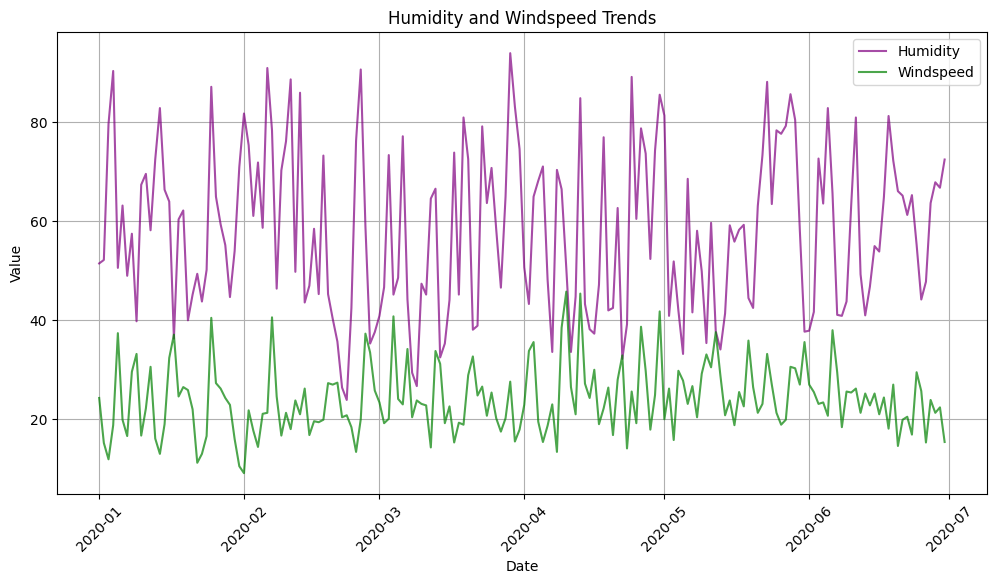

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['humidity'], label="Humidity", color='purple', alpha=0.7)
plt.plot(df['date'], df['windspeed'], label="Windspeed", color='green', alpha=0.7)
plt.title("Humidity and Windspeed Trends")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


         date  avg_passengers_per_trip
0  2020-01-01                 1.663303
1  2020-01-02                 1.562954
2  2020-01-03                 1.554315
3  2020-01-04                 1.618642
4  2020-01-05                 1.573112


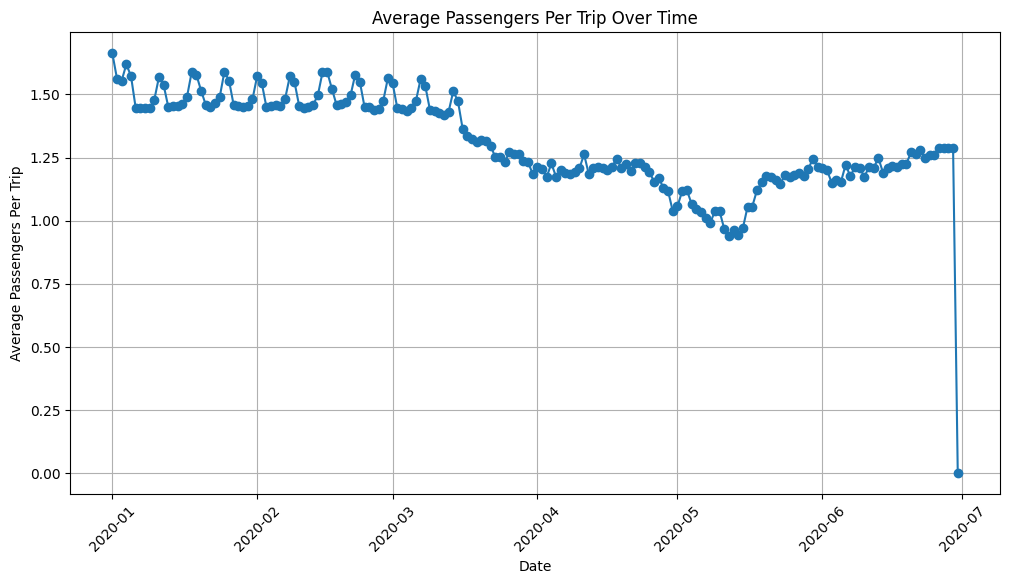

In [31]:
df['avg_passengers_per_trip'] = df['total_passenger_count'] / df['trip_count']
print(df[['date', 'avg_passengers_per_trip']].head())

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['avg_passengers_per_trip'], marker='o')
plt.title("Average Passengers Per Trip Over Time")
plt.xlabel("Date")
plt.ylabel("Average Passengers Per Trip")
plt.grid()
plt.xticks(rotation=45)
plt.show()


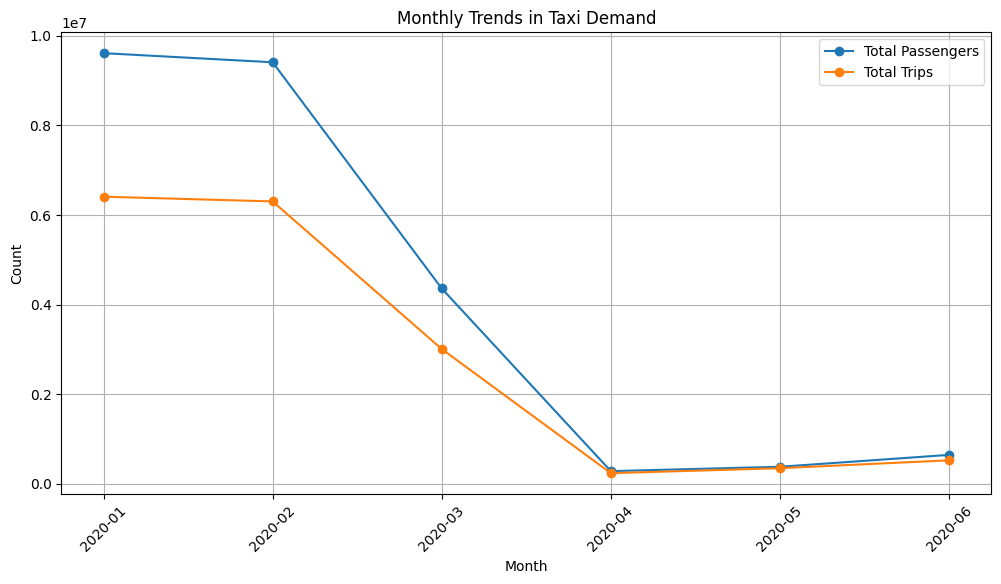

In [32]:
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
monthly_summary = df.groupby('month')[['total_passenger_count', 'trip_count']].sum().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(monthly_summary['month'].astype(str), monthly_summary['total_passenger_count'], label="Total Passengers", marker='o')
plt.plot(monthly_summary['month'].astype(str), monthly_summary['trip_count'], label="Total Trips", marker='o')
plt.title("Monthly Trends in Taxi Demand")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


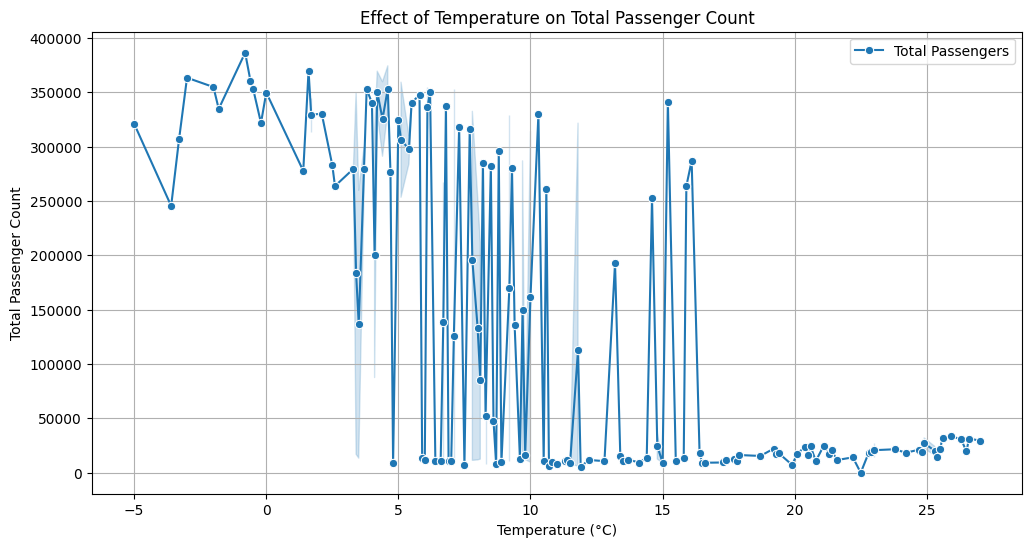

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by temperature for better visualization
df_sorted = df.sort_values(by='temp')

# Create a scatter plot with a line showing the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='temp', y='total_passenger_count', data=df_sorted, marker='o', label='Total Passengers')
plt.title("Effect of Temperature on Total Passenger Count")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total Passenger Count")
plt.grid()
plt.legend()
plt.show()


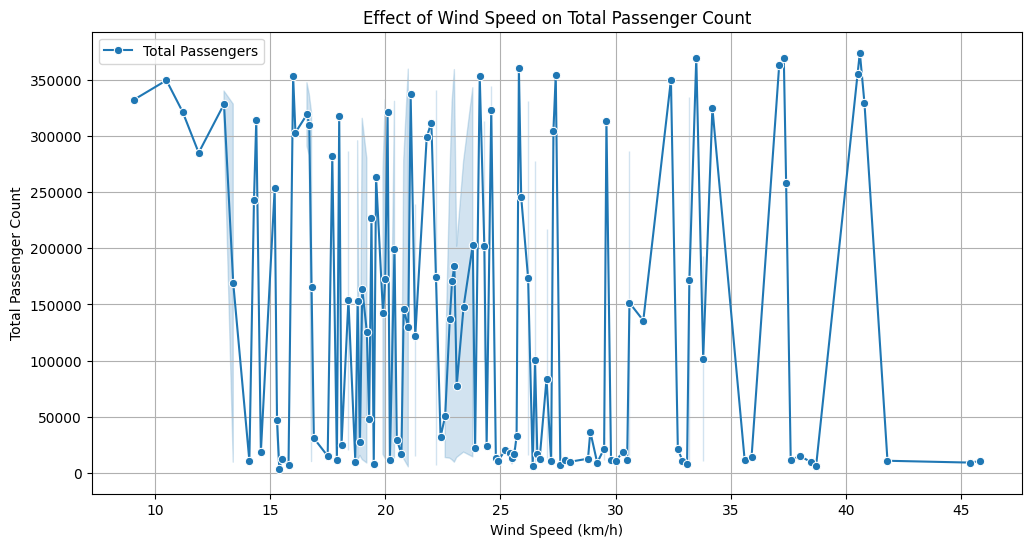

In [35]:
# Sort the data by windspeed for better visualization
df_sorted = df.sort_values(by='windspeed')

# Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='windspeed', y='total_passenger_count', data=df_sorted, marker='o', label='Total Passengers')
plt.title("Effect of Wind Speed on Total Passenger Count")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Total Passenger Count")
plt.grid()
plt.legend()
plt.show()


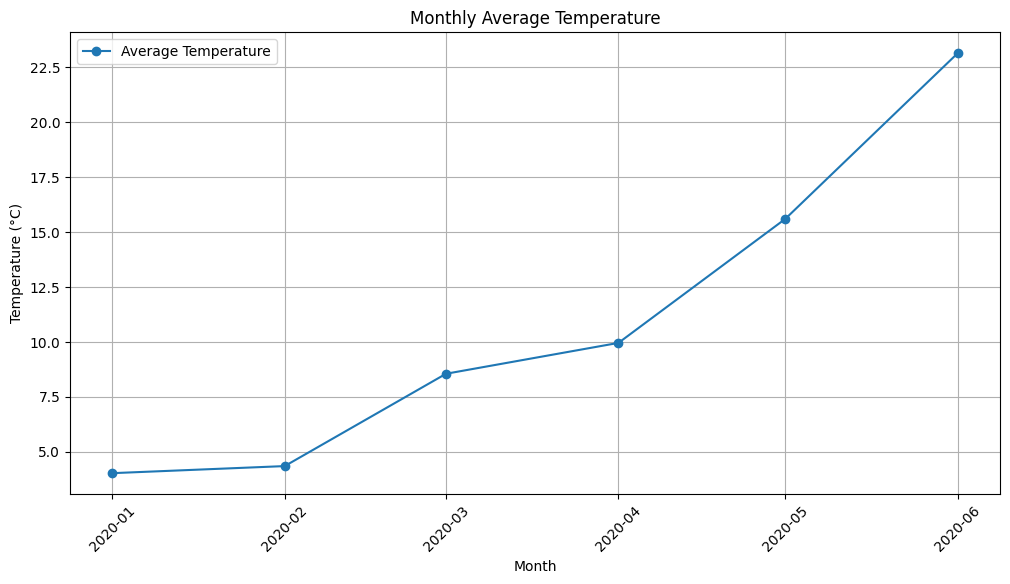

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from the date column
df['month'] = df['date'].dt.to_period('M')

# Group by month and calculate the average temperature
monthly_temp = df.groupby('month')['temp'].mean().reset_index()

# Convert the 'month' column back to datetime for plotting
monthly_temp['month'] = monthly_temp['month'].dt.to_timestamp()

# Create a line chart for monthly average temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_temp['month'], monthly_temp['temp'], marker='o', label="Average Temperature")
plt.title("Monthly Average Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()


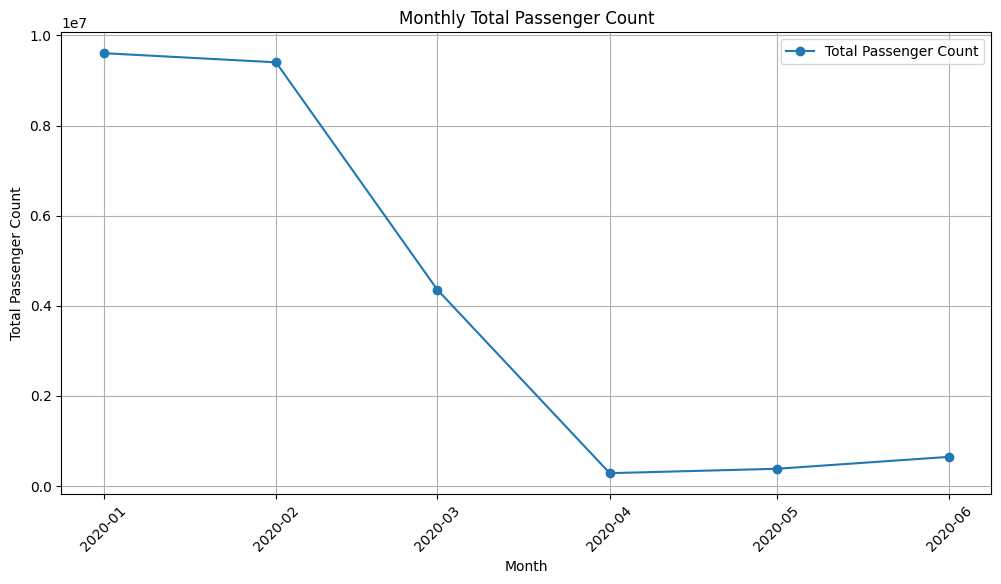

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from the date column
df['month'] = df['date'].dt.to_period('M')

# Group by month and calculate the total passenger count
monthly_passenger_count = df.groupby('month')['total_passenger_count'].sum().reset_index()

# Convert the 'month' column back to datetime for plotting
monthly_passenger_count['month'] = monthly_passenger_count['month'].dt.to_timestamp()

# Create a line chart for monthly total passenger count
plt.figure(figsize=(12, 6))
plt.plot(monthly_passenger_count['month'], monthly_passenger_count['total_passenger_count'], marker='o', label="Total Passenger Count")
plt.title("Monthly Total Passenger Count")
plt.xlabel("Month")
plt.ylabel("Total Passenger Count")
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()
